## Analysing the depreciation of the Dollar - Global Safe Asset?

Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_NA_SEC_DSS/~/Q.N.US.5Z.S1.S1.N.L.F.F3.T._Z.USD._T.M.V.N._T
Returned 293 rows for United States - Debt sec, held by non-residents, issued by residents, in all markets at all original maturities denominated in all currencies at market value net trans


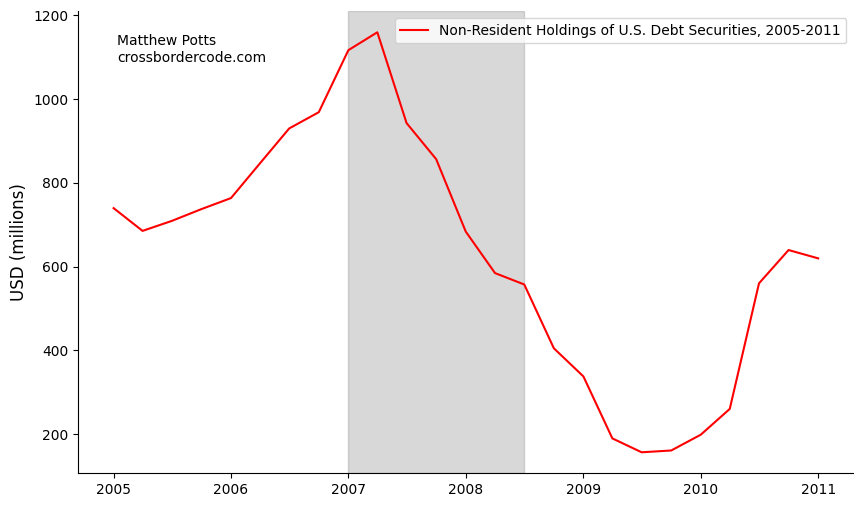

In [ ]:
# FIGURE 1  
import getBISy.data as data
import getBISy.enums as enums
from pandas import DataFrame, PeriodIndex, to_numeric, Period
import plotly.express as px
import plotly.graph_objects as go

df = data.get_debt_securities_data(
        freq='Q',
    reference_area=enums.Region.US,
    counterparty_area=enums.Region.CrossBorder,
    reporting_sector=enums.Sector.TotalEconomy,
    counterparty_sector=enums.Sector.TotalEconomy,
    accounting_entry=enums.AccountingEntry.Liabilities,
    transaction_type=enums.TransactionType.Flows,
    instrument=enums.DebtInstrumentType.All,
    maturity=enums.Maturity.Total,
    unit_of_measure=enums.UnitOfMeasure.USD,
    currency_denomination=enums.CurrencyDenomination.All,
    valuation_method=enums.ValuationMethod.MarketValue
)

df['Trailing_4Q_Sum'] = df['Value'].rolling(window=4).sum()

import pandas as pd

df['Date'] = PeriodIndex(df['Date'], freq='Q').to_timestamp()
start = Period('2005-Q1', freq='Q').to_timestamp()
end = Period('2011-Q1', freq='Q').to_timestamp()

# Filter rows between start and end (inclusive)

df = df[(df['Date'] >= start) & (df['Date'] <= end)]

line_plot(df, title = None, unit = 'USD (millions)', key = 'Non-Resident Holdings of U.S. Debt Securities, 2005-2011',
                   include_gfc=True)

Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_NA_SEC_DSS/~/Q.N.US.5Z.S12.S1.N.A.F.F3.T._Z.USD._T.M.V.N._T
Returned 293 rows for United States - Debt sec, held by FC, issued by non-residents, in all markets at all original maturities denominated in all currencies at market value net trans


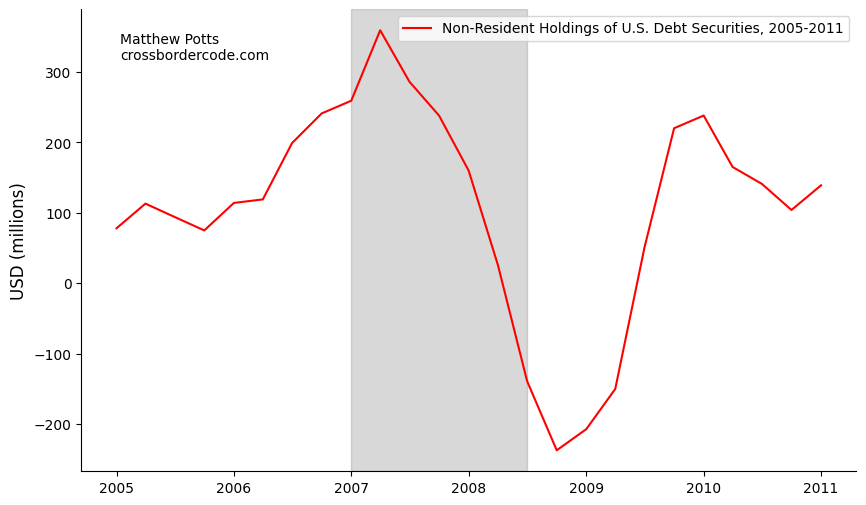

In [34]:
## Figure 2 - U.S. residents' holdings of foreign debt massively fell off - capital came home

import getBISy.data as data
import getBISy.enums as enums
from pandas import DataFrame, PeriodIndex, to_numeric, Period


df = data.get_debt_securities_data(
        freq='Q',
    reference_area=enums.Region.US,
    counterparty_area=enums.Region.CrossBorder,
    reporting_sector=enums.Sector.FinancialSector,
    counterparty_sector=enums.Sector.TotalEconomy,
    accounting_entry=enums.AccountingEntry.Assets,
    transaction_type=enums.TransactionType.Flows,
    instrument=enums.DebtInstrumentType.All,
    maturity=enums.Maturity.Total,
    unit_of_measure=enums.UnitOfMeasure.USD,
    currency_denomination=enums.CurrencyDenomination.All,
    valuation_method=enums.ValuationMethod.MarketValue
)

df['Trailing_4Q_Sum'] = df['Value'].rolling(window=4).sum()

import pandas as pd

df['Date'] = PeriodIndex(df['Date'], freq='Q').to_timestamp()
start = Period('2005-Q1', freq='Q').to_timestamp()
end = Period('2011-Q1', freq='Q').to_timestamp()

# Filter rows between start and end (inclusive)

df = df[(df['Date'] >= start) & (df['Date'] <= end)]


line_plot(df, title = None, unit = 'USD (millions)', key = 'Non-Resident Holdings of U.S. Debt Securities, 2005-2011',
                   include_gfc=True)



In [ ]:
def line_plot(
        df: pd.DataFrame, 
        title: str = None, 
        unit : str = 'USD (millions)', 
        key: str = 'Title',
        sig_loc: str = 'top left',
        include_gfc: bool = False) -> None:
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['Date'], df['Trailing_4Q_Sum'], color='red', label=key)

    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if include_gfc:
        start_period = pd.Timestamp('2007-01-01')
        end_period = pd.Timestamp('2008-06-30')
        ax.add_patch(Rectangle((start_period, ax.get_ylim()[0]),
                                end_period - start_period,
                                ax.get_ylim()[1] - ax.get_ylim()[0],
                                color='grey', alpha=0.3))

    # Add title if provided
    if title:
        ax.set_title(title, fontsize=14, fontweight='bold')

    ax.set_ylabel(unit, fontsize=12)

    if sig_loc == 'bottom right':
        ax.text(0.95, 0.05, 'Matthew Potts\ncrossbordercode.com',
            fontsize=10, color='black',
            ha='right', va='bottom', transform=ax.transAxes)
    elif sig_loc == 'top left':
        ax.text(0.05, 0.95, 'Matthew Potts\ncrossbordercode.com',
            fontsize=10, color='black',
            ha='left', va='top', transform=ax.transAxes)

    # Add legend for the line key
    ax.legend()

    # Display the plot
    plt.show()

Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_NA_SEC_DSS/~/Q.N.US.5Z.S13.S1.N.L.LE.F3.T._Z.USD._T.M.V.N._T
Returned 293 rows for United States - Debt sec, held by non-residents, issued by gen govt, in all markets at all original maturities denominated in all currencies at market value stocks


Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_NA_SEC_DSS/~/Q.N.US.5Z.S13.S1.N.L.LE.F3.T._Z.USD._T.M.V.N._T
Returned 293 rows for United States - Debt sec, held by non-residents, issued by gen govt, in all markets at all original maturities denominated in all currencies at market value stocks


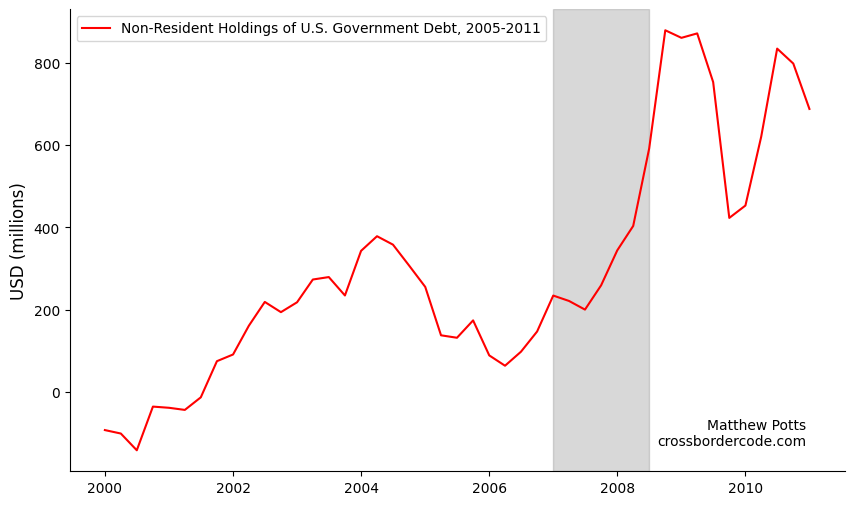

In [73]:
## Figure 3 - GFC saw a flow into U.S. GOVERNMENT debt securities by foreigners, even as total holdings fell.
import getBISy.data as data
import getBISy.enums as enums
import pandas as pd


df_govt = data.get_debt_securities_data(
        freq='Q',
    reference_area=enums.Region.US,
    counterparty_area=enums.Region.CrossBorder,
    reporting_sector=enums.Sector.GeneralGovernment,
    counterparty_sector=enums.Sector.TotalEconomy,
    accounting_entry=enums.AccountingEntry.Liabilities,
    transaction_type=enums.TransactionType.Stocks,
    instrument=enums.DebtInstrumentType.All,
    maturity=enums.Maturity.Total,
    unit_of_measure=enums.UnitOfMeasure.USD,
    currency_denomination=enums.CurrencyDenomination.All,
    valuation_method=enums.ValuationMethod.MarketValue
)


df_govt['Date'] = PeriodIndex(df_govt['Date'], freq='Q').to_timestamp()
start = Period('2000-Q1', freq='Q').to_timestamp()
end = Period('2011-Q1', freq='Q').to_timestamp()

df_govt['Value'] = to_numeric(df_govt['Value']).diff()
df_govt['Trailing_4Q_Sum'] = df_govt['Value'].rolling(window=4).sum()

df_govt = df_govt[(df_govt['Date'] >= start) & (df_govt['Date'] <= end)]


# plot_figure_trailing(df)
line_plot(df_govt, title = None, unit = 'USD (millions)', key = 'Non-Resident Holdings of U.S. Government Debt, 2005-2011',
                   sig_loc = 'bottom right', include_gfc=True)  


Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_NA_SEC_DSS/~/Q.N.US.5Z.S12.S1.N.L.LE.F3.T._Z.USD._T.M.V.N._T
Returned 293 rows for United States - Debt sec, held by non-residents, issued by FC, in all markets at all original maturities denominated in all currencies at market value stocks
Returned 293 rows for United States - Debt sec, held by non-residents, issued by FC, in all markets at all original maturities denominated in all currencies at market value stocks


Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_NA_SEC_DSS/~/Q.N.US.5Z.S12.S1.N.L.LE.F3.T._Z.USD._T.M.V.N._T
Returned 293 rows for United States - Debt sec, held by non-residents, issued by FC, in all markets at all original maturities denominated in all currencies at market value stocks
Returned 293 rows for United States - Debt sec, held by non-residents, issued by FC, in all markets at all original maturities denominated in all currencies at market value stocks


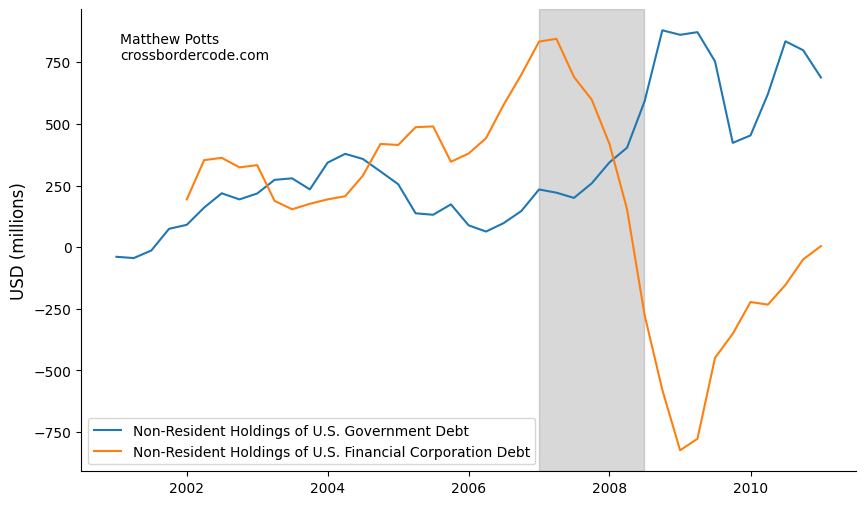

In [58]:
## Figure 4 - Contrast this with Financial Corporations, which got dumped

df = data.get_debt_securities_data(
    freq='Q',
    reference_area=enums.Region.US,
    counterparty_area=enums.Region.CrossBorder,
    reporting_sector=enums.Sector.FinancialSector,
    counterparty_sector=enums.Sector.TotalEconomy,
    accounting_entry=enums.AccountingEntry.Liabilities,
    transaction_type=enums.TransactionType.Stocks,
    instrument=enums.DebtInstrumentType.All,
    maturity=enums.Maturity.Total,
    unit_of_measure=enums.UnitOfMeasure.USD,
    currency_denomination=enums.CurrencyDenomination.All,
    valuation_method=enums.ValuationMethod.MarketValue
)

df['Date'] = pd.PeriodIndex(df['Date'], freq='Q').to_timestamp()
start = Period('2001-Q1', freq='Q').to_timestamp()
end = Period('2011-Q1', freq='Q').to_timestamp()
df = df[(df['Date'] >= start) & (df['Date'] <= end)]

df_govt = df_govt[(df_govt['Date'] >= start) & (df_govt['Date'] <= end)]

df['Value'] = to_numeric(df['Value']).diff()
df['Trailing_4Q_Sum'] = df['Value'].rolling(window=4).sum()

multi_line_plot([df_govt, df], title = None, unit = 'USD (millions)',
                    key = ['Non-Resident Holdings of U.S. Government Debt',
                           'Non-Resident Holdings of U.S. Financial Corporation Debt'],
                    include_gfc=True)


In [68]:
## Figure 5 - The U.S. dollar didn't strengthen because its a safe haven - it strenghened because foreigners bought short-term U.S. debt securities to cover their short positions in U.S. in the carry

df = data.get_debt_securities_data(
    freq='Q',
    reference_area=enums.Region.US,
    counterparty_area=enums.Region.CrossBorder,
    reporting_sector=enums.Sector.TotalEconomy,
    counterparty_sector=enums.Sector.TotalEconomy,
    accounting_entry=enums.AccountingEntry.Liabilities,
    transaction_type=enums.TransactionType.Stocks,
    instrument=enums.DebtInstrumentType.All,
    maturity=enums.Maturity.ShortTermOriginal,
    unit_of_measure=enums.UnitOfMeasure.USD,
    currency_denomination=enums.CurrencyDenomination.All,
    valuation_method=enums.ValuationMethod.MarketValue
)


df['Date'] = pd.PeriodIndex(df['Date'], freq='Q').to_timestamp()
start = Period('2005-Q1', freq='Q').to_timestamp()
end = Period('2009-Q1', freq='Q').to_timestamp()
df = df[(df['Date'] >= start) & (df['Date'] <= end)]

df['Value'] = to_numeric(df['Value']).diff()
df['Trailing_4Q_Sum'] = df['Value'].rolling(window=4).sum()

df_short_term = df


Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_NA_SEC_DSS/~/Q.N.US.5Z.S1.S1.N.L.LE.F3.S._Z.USD._T.M.V.N._T
Returned 293 rows for United States - Debt sec, held by non-residents, issued by residents, in all markets at st org mat <= 1y denominated in all currencies at market value stocks


Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_NA_SEC_DSS/~/Q.N.US.5Z.S1.S1.N.L.LE.F3.L._Z.USD._T.M.V.N._T
Returned 293 rows for United States - Debt sec, held by non-residents, issued by residents, in all markets at lt org mat (> 1y or no stated maturity) denominated in all currencies at market value stocks


Getting URL: https://stats.bis.org/api/v2/data/dataflow/BIS/WS_NA_SEC_DSS/~/Q.N.US.5Z.S1.S1.N.L.LE.F3.L._Z.USD._T.M.V.N._T
Returned 293 rows for United States - Debt sec, held by non-residents, issued by residents, in all markets at lt org mat (> 1y or no stated maturity) denominated in all currencies at market value stocks


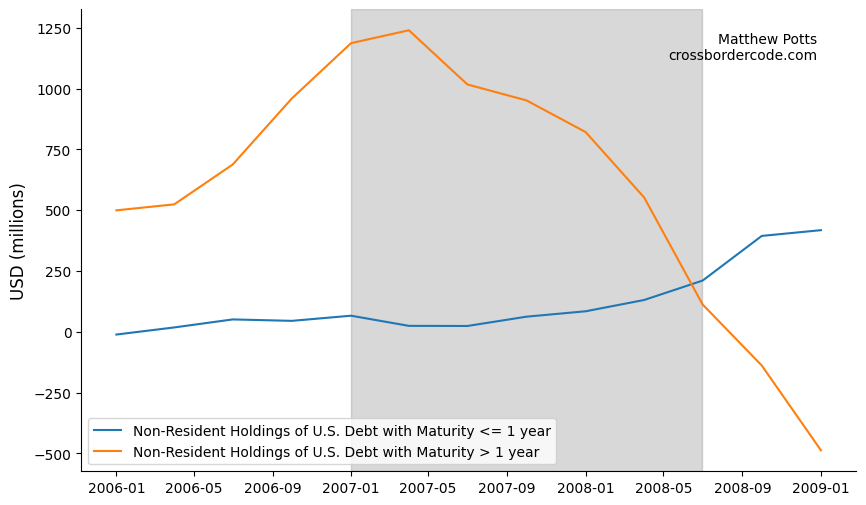

In [77]:
## Figure 6 - The U.S. dollar didn't strengthen because its a safe haven - it strenghened because foreigners bought short-term U.S. debt securities to cover their short positions in U.S. in the carry

df = data.get_debt_securities_data(
    freq='Q',
    reference_area=enums.Region.US,
    counterparty_area=enums.Region.CrossBorder,
    reporting_sector=enums.Sector.TotalEconomy,
    counterparty_sector=enums.Sector.TotalEconomy,
    accounting_entry=enums.AccountingEntry.Liabilities,
    transaction_type=enums.TransactionType.Stocks,
    instrument=enums.DebtInstrumentType.All,
    maturity=enums.Maturity.LongTermOriginal,
    unit_of_measure=enums.UnitOfMeasure.USD,
    currency_denomination=enums.CurrencyDenomination.All,
    valuation_method=enums.ValuationMethod.MarketValue
)

df['Date'] = pd.PeriodIndex(df['Date'], freq='Q').to_timestamp()
start = Period('2005-Q1', freq='Q').to_timestamp()
end = Period('2009-Q1', freq='Q').to_timestamp()
df = df[(df['Date'] >= start) & (df['Date'] <= end)]

df['Value'] = to_numeric(df['Value']).diff()
df['Trailing_4Q_Sum'] = df['Value'].rolling(window=4).sum()

multi_line_plot([df_short_term, df], title = None, unit = 'USD (millions)',
                    key = ['Non-Resident Holdings of U.S. Debt with Maturity <= 1 year',
                            'Non-Resident Holdings of U.S. Debt with Maturity > 1 year'],
                            sig_loc = 'top right',
                    include_gfc=True)

In [76]:
def multi_line_plot(
        df: list[pd.DataFrame], 
        key: list[str], 
        title: str = None, 
        unit: str = 'USD (millions)',
        sig_loc: str = 'top left',
        include_gfc: bool = False) -> None:
    
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each DataFrame with its corresponding key
    for df, key in zip(df, key):
        ax.plot(df['Date'], df['Trailing_4Q_Sum'], label=key)

    # Set background color
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    # Remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add grey bar for the period 2007 Q1 - 2008 Q2 if include_gfc is True
    if include_gfc:
        start_period = pd.Timestamp('2007-01-01')
        end_period = pd.Timestamp('2008-06-30')
        ax.add_patch(Rectangle((start_period, ax.get_ylim()[0]),
                                end_period - start_period,
                                ax.get_ylim()[1] - ax.get_ylim()[0],
                                color='grey', alpha=0.3))

    # Add title if provided
    if title:
        ax.set_title(title, fontsize=14, fontweight='bold')

    # Set y-axis label with unit
    ax.set_ylabel(unit, fontsize=12)

    if sig_loc == 'bottom right':
        ax.text(0.95, 0.05, 'Matthew Potts\ncrossbordercode.com',
            fontsize=10, color='black',
            ha='right', va='bottom', transform=ax.transAxes)
    elif sig_loc == 'top left':
        ax.text(0.05, 0.95, 'Matthew Potts\ncrossbordercode.com',
            fontsize=10, color='black',
            ha='left', va='top', transform=ax.transAxes)
    elif sig_loc == 'top right':
        ax.text(0.95, 0.95, 'Matthew Potts\ncrossbordercode.com',
            fontsize=10, color='black',
            ha='right', va='top', transform=ax.transAxes)

    # Add legend for the keys
    ax.legend()

    # Display the plot
    plt.show()

In [104]:
import eikon as ek
import datetime

def fetch_ir_differential(currency_code, freq='monthly'):
    if freq == 'monthly':
        foreign_code = f"{currency_code}1MT=RR"
        us_code = "US1MT=RRPS"
        interval = "weekly"
    elif freq == 'yearly':
        foreign_code = f"{currency_code}1YT=RR"
        us_code = "US1YT=RRPS"
        interval = "weekly"
    foreign = ek.get_timeseries([foreign_code], start_date="2000-01-01", end_date=datetime.datetime.now(), interval=interval, fields=["CLOSE"])
    us = ek.get_timeseries([us_code], start_date="2000-01-01", end_date=datetime.datetime.now(), interval=interval, fields=["CLOSE"])
    df = foreign.join(us, lsuffix=f'_{currency_code}', rsuffix='_US')
    df['ir_differential'] = df[f'CLOSE_{currency_code}'] - df['CLOSE_US']
    return df

# List of currency codes (already stripped)
currency_freqs = [
    ('SE', 'monthly'),
    ('CA', 'monthly'),
    ('CH', 'monthly'),
    ('NO', 'monthly'),
    ('AU', 'yearly'),
    ('NZ', 'monthly'),
    ('PL', 'monthly'),
    ('HU', 'yearly'),
    ('IN', 'yearly'),
    ('MX', 'monthly')
]

ek.set_app_key('663b1d7b8cee4f94a88badfb9ad041573374285c')

ir_dfs = {}
for code, freq in currency_freqs:
    ir_dfs[code] = fetch_ir_differential(code, freq=freq)

In [105]:
# Combine all individual DataFrames in ir_dfs into a single DataFrame
ir_dfs_combined = pd.concat(
    [df['ir_differential'].rename(currency) for currency, df in ir_dfs.items()],
    axis=1
).reset_index()

# Rename columns for clarity
ir_dfs_combined.rename(columns={"index": "date"}, inplace=True)

# Display the first few rows of the combined DataFrame
ir_dfs_combined.head()

,Date,SE,CA,CH,NO,AU,NZ,PL,HU,IN,MX
0,2000-01-07,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2000-01-09,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,2000-01-14,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,2000-01-16,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,2000-01-21,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


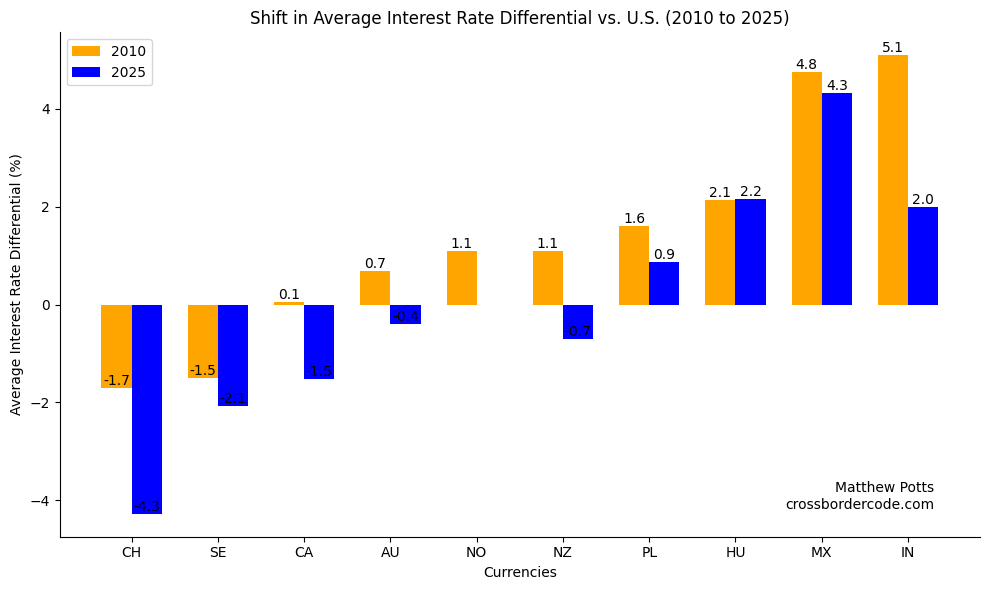

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with actual data)
categories = ['CH', 'SE', 'CA', 'AU', 'NO', 'NZ', 'PL', 'HU', 'MX', 'IN']
data_2010 = ir_dfs_combined[ir_dfs_combined['Date'].dt.year >= 2010]
data_2025 = ir_dfs_combined[ir_dfs_combined['Date'].dt.year >= 2025]

# Calculate the mean interest rate differential for each currency in 2010 and 2022
data_2010_means = data_2010[categories].mean(skipna=True)
data_2025_means = data_2022[categories].mean(skipna=True)

# Convert any <NA> to np.nan and fill with 0 or drop as needed
data_2010_means = data_2010_means.astype(float)
data_2025_means = data_2022_means.astype(float)

# Create the bar plot
bars_2010 = ax.bar(x - width/2, data_2010_means, width, label='2010', color='orange')
bars_2022 = ax.bar(x + width/2, data_2025_means, width, label='2025', color='blue')

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_2010 = ax.bar(x - width/2, data_2010_means, width, label='2010', color='orange')
bars_2022 = ax.bar(x + width/2, data_2025_means, width, label='2025', color='blue')


# Add labels, title, and legend
ax.set_xlabel('Currencies')
ax.set_ylabel('Average Interest Rate Differential (%)')
ax.set_title('Shift in Average Interest Rate Differential vs. U.S. (2010 to 2025)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add value labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}', ha='center', va='bottom')

add_labels(bars_2010)
add_labels(bars_2022)

ax.text(0.95, 0.05, 'Matthew Potts\ncrossbordercode.com',
    fontsize=10, color='black',
    ha='right', va='bottom', transform=ax.transAxes)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()